#### Importing Requisite Libraries

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as scipy
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler,Normalizer,MinMaxScaler
import pylab
from sklearn.metrics import r2_score,mean_squared_error,accuracy_score,confusion_matrix,classification_report,roc_curve
from scipy.stats import shapiro
from sklearn.linear_model import LinearRegression,ElasticNet,Lasso,Ridge,LogisticRegression
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor,GradientBoostingClassifier,GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.model_selection import GridSearchCV,GroupShuffleSplit,LeaveOneOut,StratifiedKFold,StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.cluster import AgglomerativeClustering,KMeans,DBSCAN
from sklearn.decomposition import PCA

#### Loading the dataset

In [3]:
filepath = r"C:\Users\TOSHIBA\Desktop\haptik.xlsx"

In [4]:
data = pd.read_excel(filepath)

#### Displaying the first and the last 5 rows of the dataset

In [5]:
data.head()

,Child Id,Parent Company ID,Date Range,Rev from Product A,Rev from Product B,Rev from Product C,Rev from Product D,Total Revenue,Unique Parent Company ID
0,1,b1,2017-12-01 -> 2017-12-01,0.0,0.19,0.00,0.0,0.19,b1
1,2,b1,2017-12-18 -> 2017-12-18,0.0,0.00,0.31,0.0,0.31,b2
2,3,b1,2017-12-07 -> 2017-12-07,0.0,0.00,0.46,0.0,0.46,b3
3,4,b2,2017-12-24 -> 2017-12-25,0.0,0.00,1.07,0.0,1.07,b4
4,5,b3,2017-12-06 -> 2017-12-20,0.0,0.00,1.18,0.0,1.18,b5


In [6]:
data.tail()

,Child Id,Parent Company ID,Date Range,Rev from Product A,Rev from Product B,Rev from Product C,Rev from Product D,Total Revenue,Unique Parent Company ID
465,466,b233,2017-12-22 -> 2017-12-28,0.0,0.00,0.29,0.0,0.29,NaN
466,467,b234,2017-12-22 -> 2017-12-22,0.0,0.00,0.28,0.0,0.28,NaN
467,468,b234,2017-12-19 -> 2017-12-28,0.0,0.00,0.26,0.0,0.26,NaN
468,469,b235,2017-12-01 -> 2017-12-21,0.0,249.44,10169.33,0.0,10418.77,NaN
469,470,b235,2017-12-28 -> 2017-12-28,0.0,0.00,0.04,0.0,0.04,NaN


#### Displaying the basic information and statistics of the dataset

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Child Id                  470 non-null    int64  
 1   Parent Company ID         470 non-null    object 
 2   Date Range                470 non-null    object 
 3   Rev from Product A        470 non-null    float64
 4   Rev from Product B        470 non-null    float64
 5   Rev from Product C        470 non-null    float64
 6   Rev from Product D        470 non-null    float64
 7   Total Revenue             470 non-null    float64
 8   Unique Parent Company ID  228 non-null    object 
dtypes: float64(5), int64(1), object(3)
memory usage: 33.2+ KB


In [8]:
data.describe()

,Child Id,Rev from Product A,Rev from Product B,Rev from Product C,Rev from Product D,Total Revenue
count,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000
mean,235.344681,33.561830,48.859745,186.069426,3.881255,272.372255
std,136.082332,333.090534,229.258606,649.794730,16.941190,792.760626
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.040000
25%,118.250000,0.000000,0.000000,0.000000,0.000000,5.002500
50%,235.500000,0.000000,0.000000,25.465000,0.000000,53.785000
75%,352.750000,0.000000,0.000000,152.117500,0.997500,251.370000
max,470.000000,6208.440000,2984.000000,10169.330000,204.030000,10418.770000


In [9]:
data.describe(include='all')

,Child Id,Parent Company ID,Date Range,Rev from Product A,Rev from Product B,Rev from Product C,Rev from Product D,Total Revenue,Unique Parent Company ID
count,470.000000,470,470,470.000000,470.000000,470.000000,470.000000,470.000000,228
unique,NaN,227,219,NaN,NaN,NaN,NaN,NaN,228
top,NaN,b110,2017-12-01 -> 2017-12-30,NaN,NaN,NaN,NaN,NaN,b1
freq,NaN,11,30,NaN,NaN,NaN,NaN,NaN,1
mean,235.344681,NaN,NaN,33.561830,48.859745,186.069426,3.881255,272.372255,NaN
std,136.082332,NaN,NaN,333.090534,229.258606,649.794730,16.941190,792.760626,NaN
min,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.040000,NaN
25%,118.250000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,5.002500,NaN
50%,235.500000,NaN,NaN,0.000000,0.000000,25.465000,0.000000,53.785000,NaN
75%,352.750000,NaN,NaN,0.000000,0.000000,152.117500,0.997500,251.370000,NaN


In [10]:
data.isnull().sum() #No null/missing values in the dataset

Child Id                      0
Parent Company ID             0
Date Range                    0
Rev from Product A            0
Rev from Product B            0
Rev from Product C            0
Rev from Product D            0
Total Revenue                 0
Unique Parent Company ID    242
dtype: int64

In [11]:
data.shape #Depicting the Number of columns & Number of rows in the dataset

(470, 9)

In [12]:
data.columns 

Index(['Child Id', 'Parent Company ID', 'Date Range', 'Rev from Product A',
       'Rev from Product B', 'Rev from Product C', 'Rev from Product D',
       'Total Revenue', 'Unique Parent Company ID'],
      dtype='object')

#### Exploratory Data Analysis

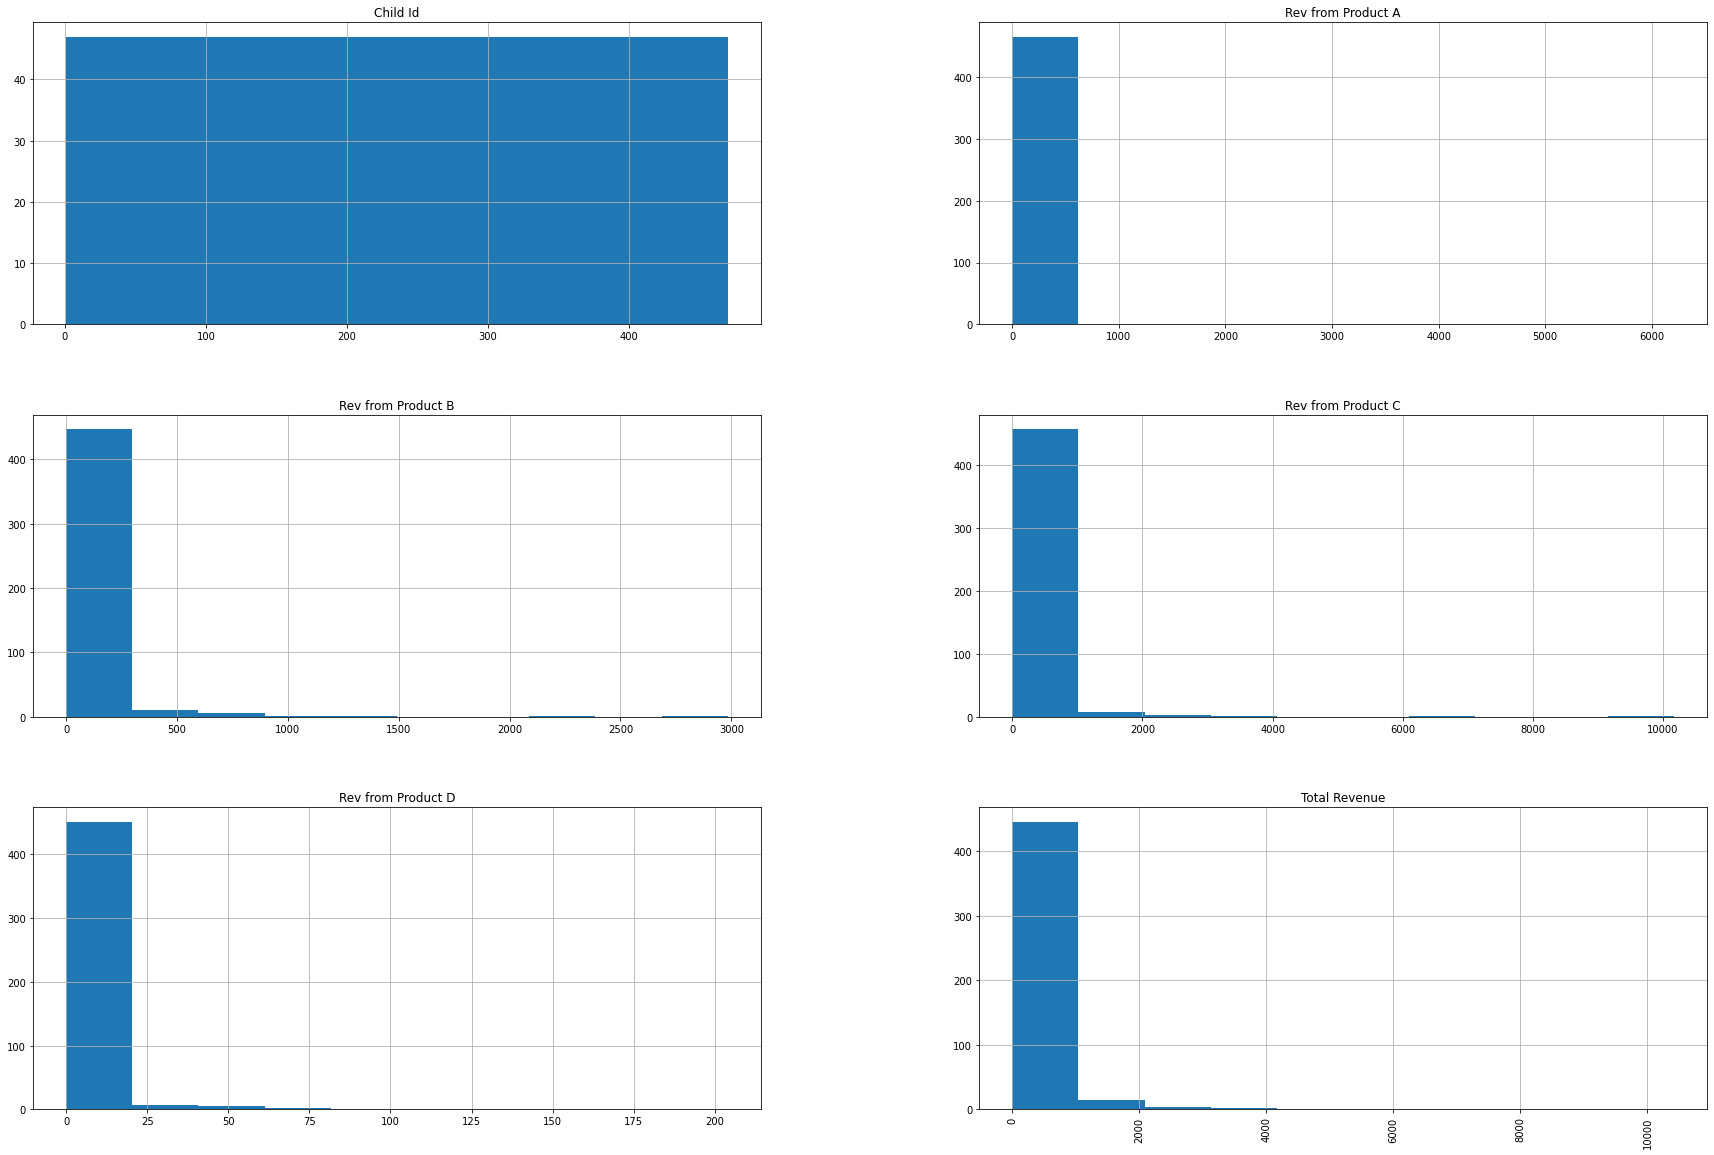

<Figure size 432x288 with 0 Axes>

In [28]:
data.hist(figsize=[30,20]) 
plt.xticks(rotation=90)
plt.show()
plt.tight_layout() # Histogram of various attributes in the dataset

<AxesSubplot:xlabel='Unique Parent Company ID', ylabel='Total Revenue'>

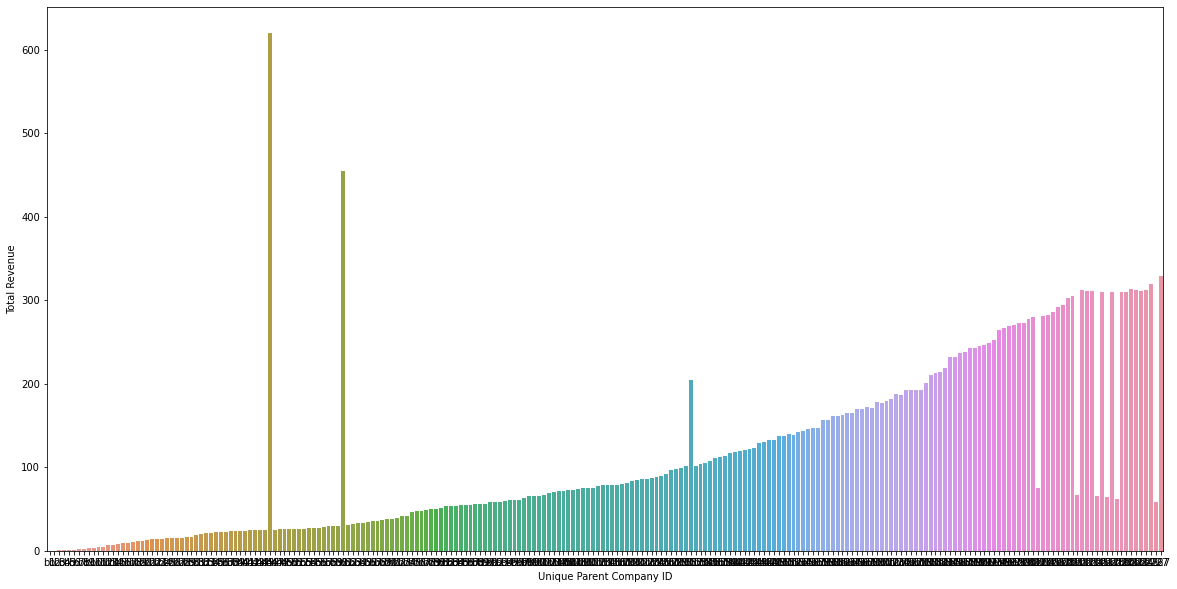

In [114]:
plt.figure(figsize=[20,10])
sns.barplot(x=data['Unique Parent Company ID'],y=data['Total Revenue'],data=data)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Child Id                  470 non-null    int64  
 1   Parent Company ID         470 non-null    object 
 2   Date Range                470 non-null    object 
 3   Rev from Product A        470 non-null    float64
 4   Rev from Product B        470 non-null    float64
 5   Rev from Product C        470 non-null    float64
 6   Rev from Product D        470 non-null    float64
 7   Total Revenue             470 non-null    float64
 8   Unique Parent Company ID  228 non-null    object 
dtypes: float64(5), int64(1), object(3)
memory usage: 33.2+ KB


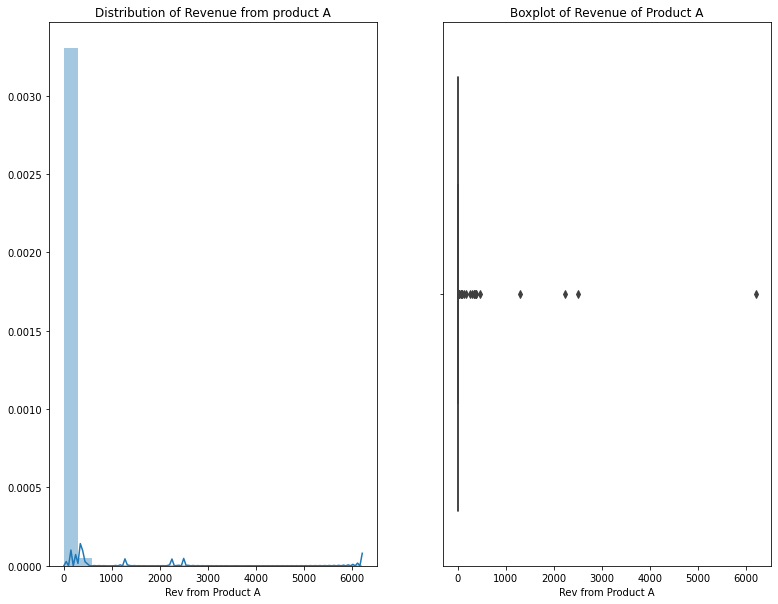

In [19]:
plt.figure(figsize=[20,10])
plt.subplot(131)
sns.distplot(data['Rev from Product A'])
plt.title("Distribution of Revenue from product A")
plt.subplot(132)
sns.boxplot(data['Rev from Product A'])
plt.title("Boxplot of Revenue of Product A")
plt.show()

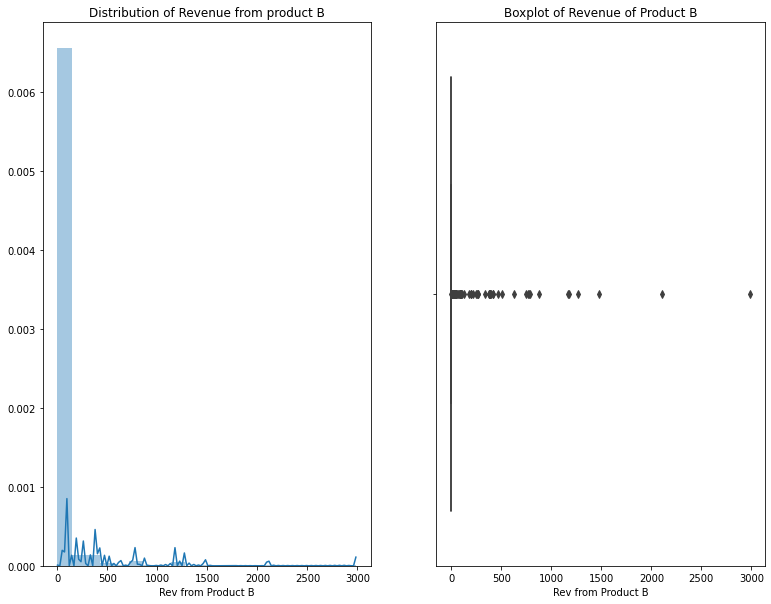

In [20]:
plt.figure(figsize=[20,10])
plt.subplot(131)
sns.distplot(data['Rev from Product B'])
plt.title("Distribution of Revenue from product B")
plt.subplot(132)
sns.boxplot(data['Rev from Product B'])
plt.title("Boxplot of Revenue of Product B")
plt.show()

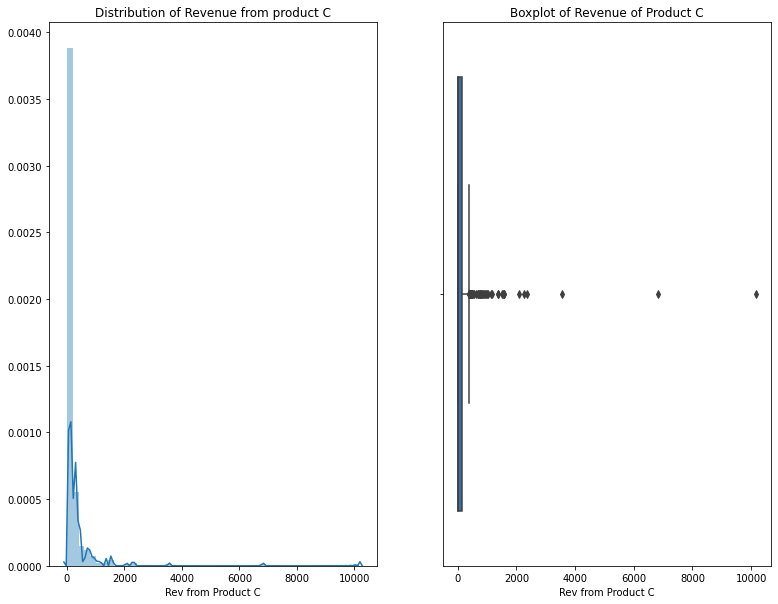

In [21]:
plt.figure(figsize=[20,10])
plt.subplot(131)
sns.distplot(data['Rev from Product C'])
plt.title("Distribution of Revenue from product C")
plt.subplot(132)
sns.boxplot(data['Rev from Product C'])
plt.title("Boxplot of Revenue of Product C")
plt.show()

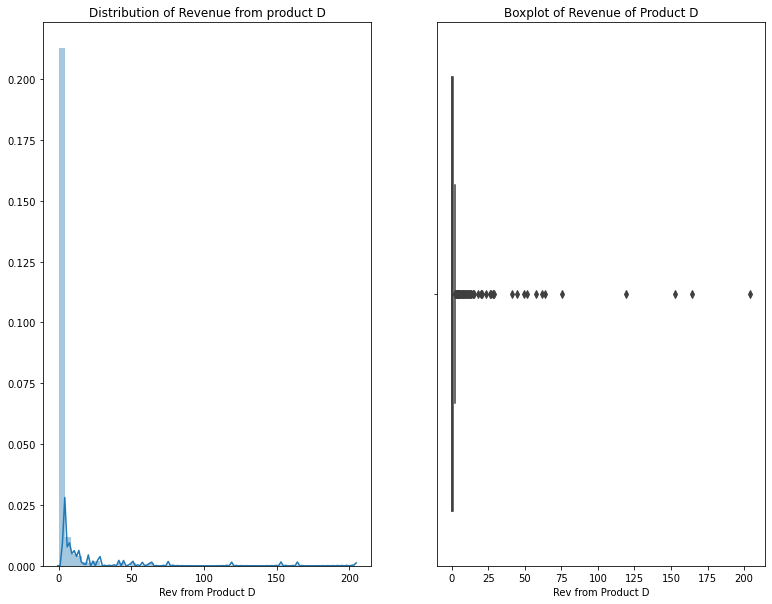

In [22]:
plt.figure(figsize=[20,10])
plt.subplot(131)
sns.distplot(data['Rev from Product D'])
plt.title("Distribution of Revenue from product D")
plt.subplot(132)
sns.boxplot(data['Rev from Product D'])
plt.title("Boxplot of Revenue of Product D")
plt.show()

#### Heatmap of the data - Showing correlation between the attributes

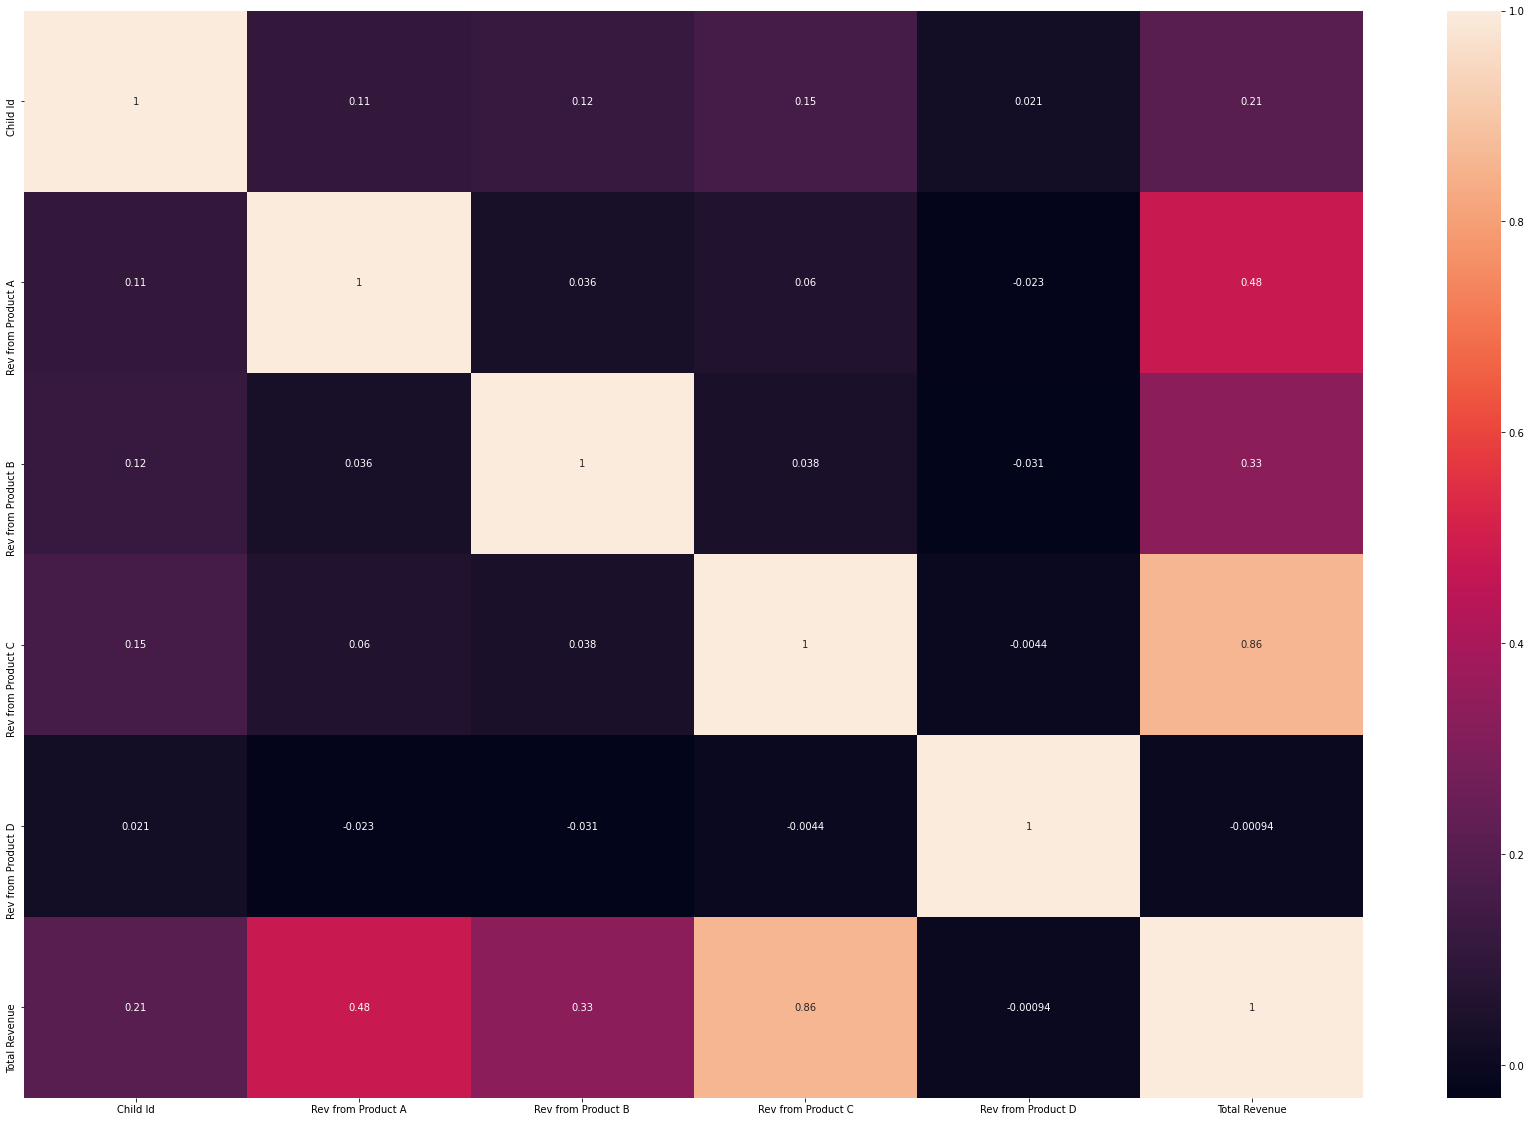

In [29]:
plt.figure(figsize=[30,20])
sns.heatmap(data.corr(),annot=True)
plt.show()

#### Pairplot of the dataset

<Figure size 1440x1080 with 0 Axes>

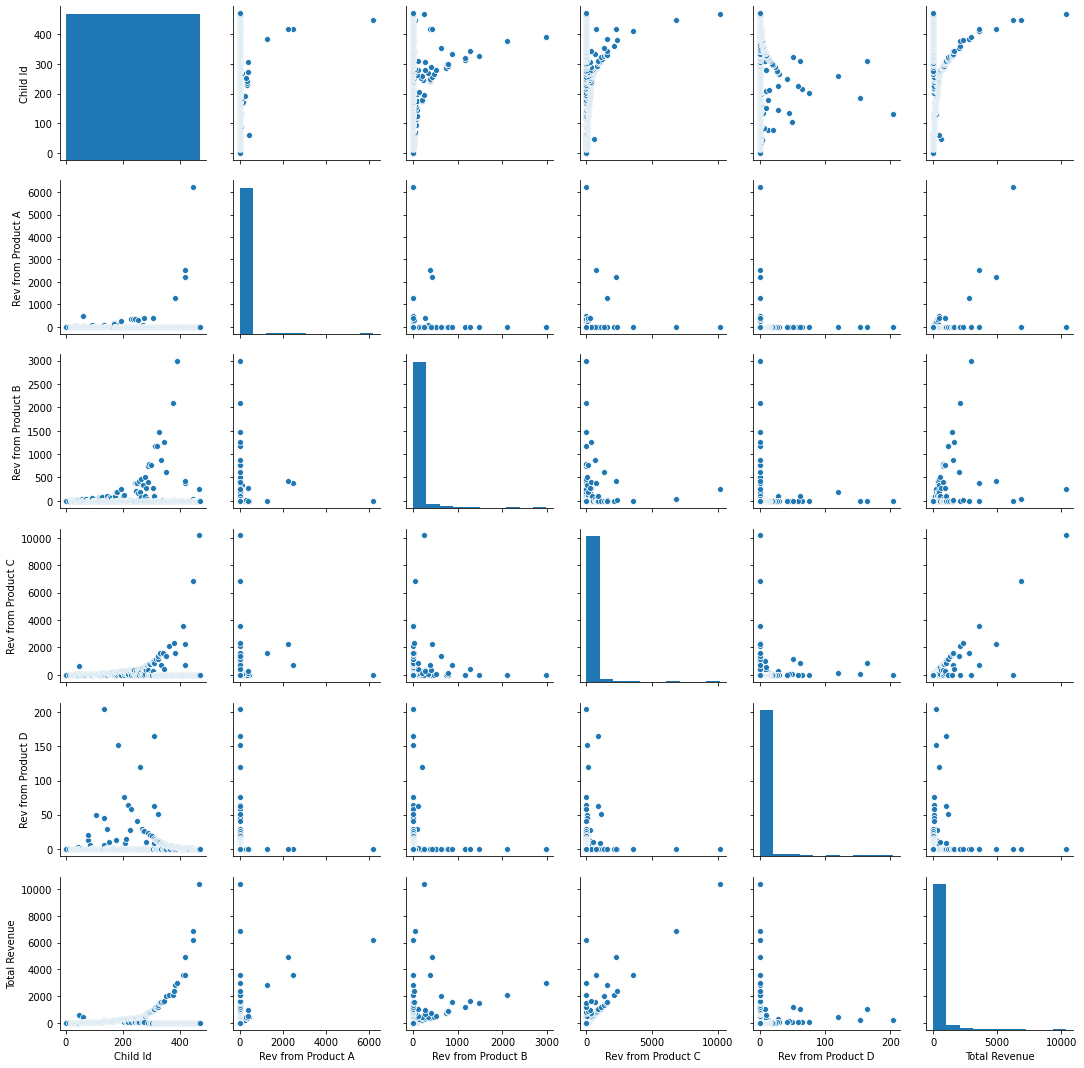

In [30]:
plt.figure(figsize=[20,15])
sns.pairplot(data)
plt.show() #Showing visualisations such as the barplot and scatterplots between all the attributes in the dataset.

In [45]:
print(data['Rev from Product A'].skew())
print(data['Rev from Product A'].kurtosis())

15.264505410833552
263.160900420443


In [46]:
print(data['Rev from Product B'].skew())
print(data['Rev from Product B'].kurtosis())

7.863805740969067
77.79573035426911


In [47]:
print(data['Rev from Product C'].skew())
print(data['Rev from Product C'].kurtosis())

10.682365211488987
143.17925154886188


In [48]:
print(data['Rev from Product D'].skew())
print(data['Rev from Product D'].kurtosis())

8.077170204563153
76.01499069004639


In [ ]:
### From the above distribution plots and skew/kurtosis calculations, you can clearly see that the revenue generated from all products are heavily right/+ve skewed. Meaning there is extremely more data towards the lower side in revenue in the charts.

<Figure size 1440x1080 with 0 Axes>

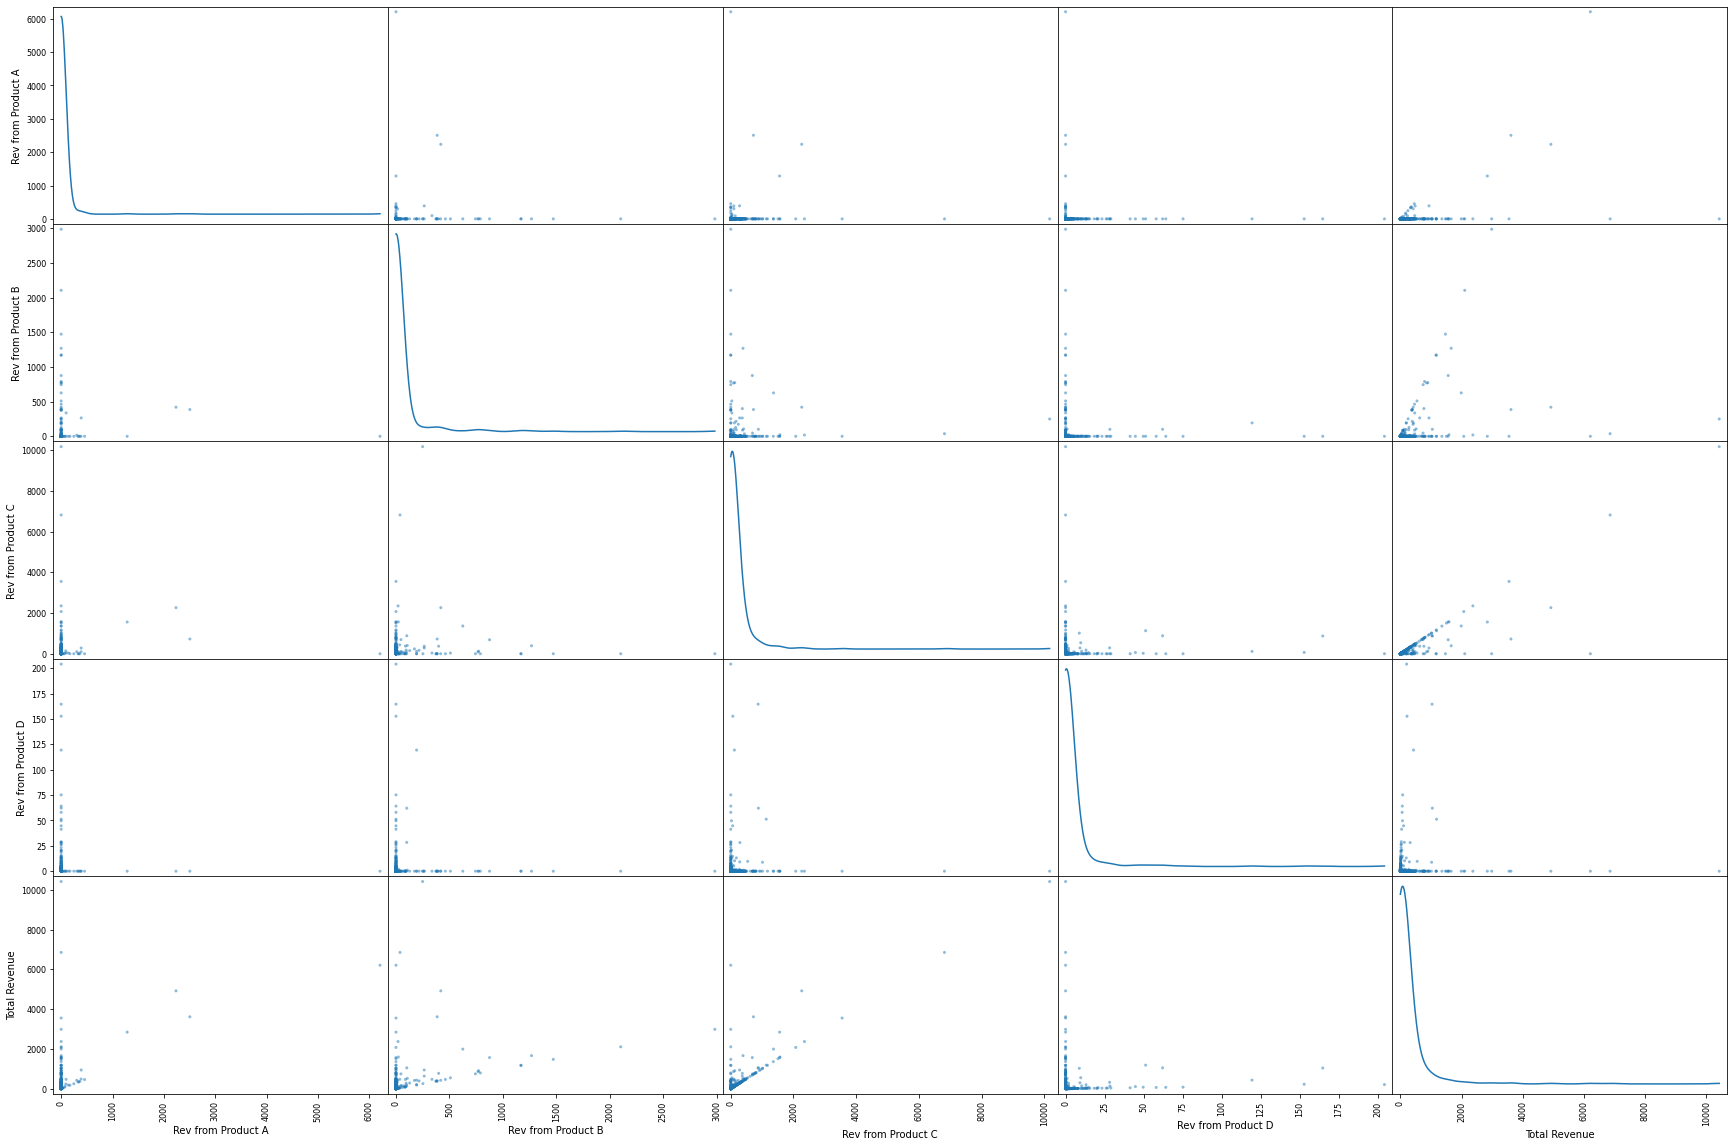

In [61]:
plt.figure(figsize=(20,15))
pd.plotting.scatter_matrix(data.loc[:, "Rev from Product A":"Total Revenue"], diagonal="kde",figsize=[30,20])
plt.show()

In [104]:
print('Share of revenue from Product A is',(data['Rev from Product A'].sum()/data['Total Revenue'].sum())*100, '%')

Share of revenue from Product A is 12.322044236079906 %


In [101]:
print('Share of revenue from Product B is',(data['Rev from Product B'].sum()/data['Total Revenue'].sum())*100, '%')

Share of revenue from Product B is 17.93859092718538 %


In [102]:
print('Share of revenue from Product C is',(data['Rev from Product C'].sum()/data['Total Revenue'].sum())*100, '%')

Share of revenue from Product C is 68.31438294399341 %


In [103]:
print('Share of revenue from Product D is',(data['Rev from Product D'].sum()/data['Total Revenue'].sum())*100, '%')

Share of revenue from Product D is 1.4249818927412858 %


<AxesSubplot:xlabel='Date Range', ylabel='Total Revenue'>

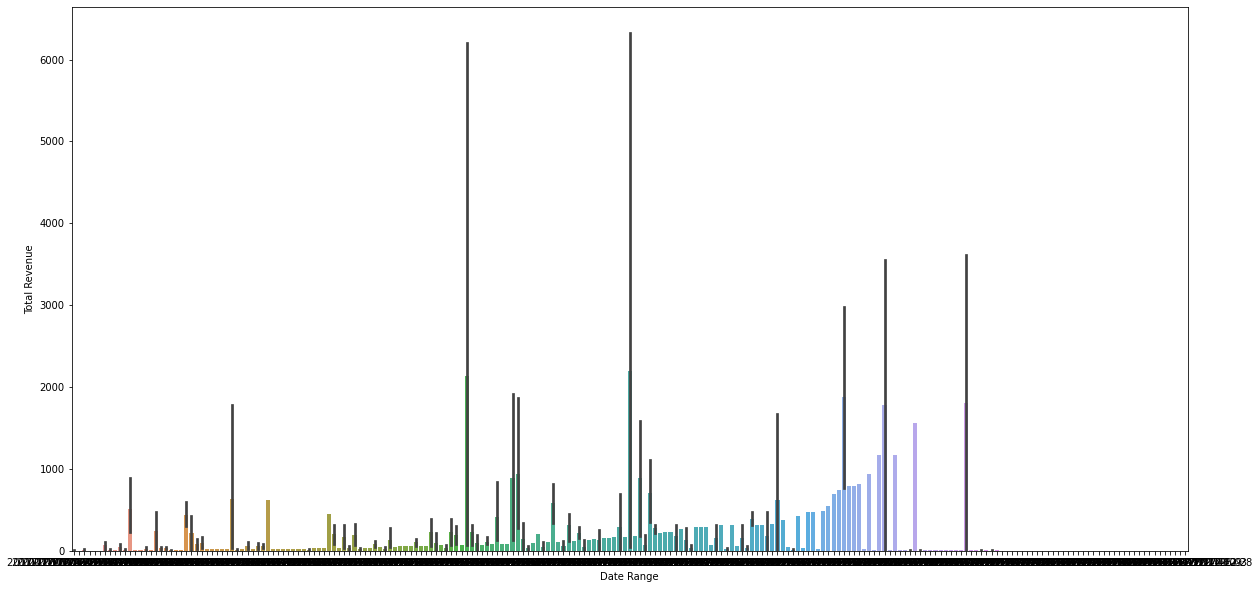

In [113]:
plt.figure(figsize=(20,10))
sns.barplot(data=data,x='Date Range',y='Total Revenue')